# Lab 4: Predicting Housing Prices with Linear Regression 🏡

## Learning Objectives
* Understanding, Implementing, and Applying Simple Linear Regression 
* Data Exploration
* Practice ML Workflow: Training, Testing, and Evaluation

## Outline

1. [Implementing Linear Regression](#1.-Implementing-Linear-Regression)
2. [Finding a House in Boston](#2.-Finding-a-House-in-Boston)
3. [Exploring the Data](#3.-Exploring-the-Data)
4. [Training the Model](#4.-Training-the-Model)
    1. [Making Training and Test Datasets](#Making-Training-and-Test-Datasets)
    2. [Regression on Boston Housing data](#Regression-on-Boston-Housing-data)
5. [Analyzing Model Performance](#5.-Analyzing-Model-Performance)
    1. [Root Mean Squared Error (RMSE)](#Root-Mean-Squared-Error)
6.  [Communicate your Results](#6.-Communicate-your-Results)

## Today's Lab

In this lab, you will build your first intelligent application that makes predictions from data. We will explore this idea within the context of our first case study, predicting house prices, where you will create models that predict a continuous value (price) from input features (square footage, number of bedrooms and bathrooms, etc.).
> This is just one of the many places where regression can be applied. Other applications range from 
* predicting health outcomes in medicine, 
* stock prices in finance, and 
* power usage in high-performance computing, 
* to analyzing which regulators are important for gene expression. 

In the lab, we will focus on implementing 1D regression (that is regression with _one_ input feature). You will also examine how to analyze the performance of your predictive model. In this week's homework `hw4` you will then explore how to use scikit-learn to apply regression in practice (using _multiple_ input features and non-linear feature transformations).  

### Some imports and configurations

In [3]:
import numpy as np
import matplotlib.pyplot as plt


from utility.util import configure_plots
configure_plots()

Plots configured! 📊


In [4]:
# need to run this twoce for some (unknown reason)
configure_plots()

Plots configured! 📊


In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Recap: Linear Regression

### What is Regression?

Let's start our discussion with the idea of **regression** itself. Its [Wikipedia article](https://en.wikipedia.org/wiki/Regression_analysis) starts with this:

> _In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships among variables._

The goal is to take a set of predictor variables, or _features_, and figure out how they contribute to the phenomenon we are interested in studying. Again, from Wikipedia, regression

> _helps one understand how the typical value of the dependent variable (or 'criterion variable') changes when any one of the [predictor] independent variables is varied while the others...are held fixed._

Regression is typically achieved by combining features with a **model**, a simple representation of the relationships between features. In the case of linear regression, we use a **linear model**, $$y = wx + b,$$ which combines the features, $x$, after weighing each by their significance, $w$, and adding a bias value, $b$, to compute the predicted value, $y$.

Put (slightly more) simply, **linear regression** tries to model the relationship between features and a phenomenon variable by fitting a line to observed data. ![Linear Regression](utility/pics/linear-regression.png)

## 1. Implementing Linear Regression

Before we start working on the Boston housing data set, we will first use the toy dataset from class to develop and test our code. The dataset is stored in a `txt` file so we have to import it first. Using this small toy dataset, we will implement a simple linear regression model that uses $x$ as predictor and $y$ as a target. 

In [6]:
x, y = np.loadtxt('utility/data/toy_data.txt')

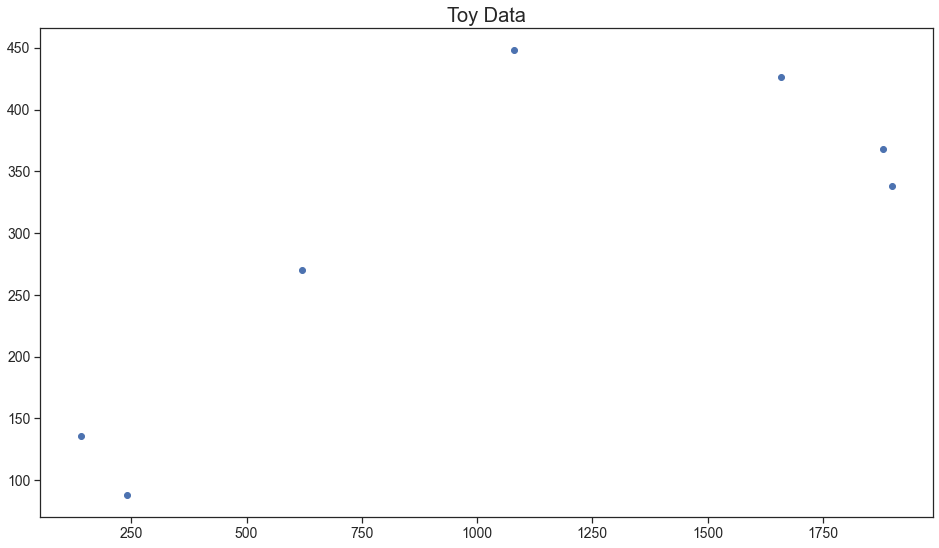

In [7]:
plt.scatter(x, y)
plt.title('Toy Data')
plt.show()

### Deriving Model Parameters

Recall the derivation of $w$ and $b$ from lecture with minimizing the **sum of squared error**, also _residual sum of squares_ (RSS) using $m$ data points for training, with slight rearrangement:


$$b = \displaystyle \frac{1}{m} \sum_{i=1}^m y_i - w \frac{1}{m} \sum_{i=1}^n x_i $$

and

$$w = \frac{\displaystyle\sum_{i=1}^m x_iy_i - \frac{1}{m} \sum_{i=1}^m x_i \sum_{i=1}^m y_i}{\displaystyle\sum_{i=1}^m x_i^2 - \frac{1}{m} \sum_{i=1}^m x_i \sum_{i=1}^m x_i}$$

> **Note**: there are a couple of _mean computations_ in this formula. Remeber to use `np.mean` and `np.sum` for your implementation below!

### Computing Regression Parameters

Now, let's implement these formulas. Do **not** use for loops!

**Try this!** Next, implement `compute_weights`. This function computes the optimal $w$ for a given data set $\mathcal{D} = (X, y)$. Refer back to the derivation from above. Assign the result of your computation to the variable `w`.

In [8]:
def compute_weights(x, y):
    '''computes the weights of the linear model that fits the data X and Y'''
    
    assert x.shape == y.shape, 'dimensions of X and Y should match in 1D linear regression'
    
    w = (np.sum(x*y)-np.mean(x)*np.sum(y))/(np.sum(x**2)-np.mean(x)*np.sum(x))

    
    return w

In [9]:
compute_weights(x,y)

0.14626764296600622

**Try this!** Next, implement `fit`. This function computes the best-fitting model parameters $w$ and $b$. Refer back to the derivation from above. Assign the result of your computation to variables `w` and `b`.

In [10]:
def fit(x, y):
    '''computes model parameters W and B that best-fit observation data X and Y'''
    
    assert x.shape == y.shape, 'dimensions of X and Y should match in 1D linear regression'
    
    w = compute_weights(x,y)
    b = np.mean(y) - w*np.mean(x)

    
    assert np.isscalar(w) and np.isscalar(b), 'W and B should be scalars in 1D linear regression'
    
    return w, b

**Try this!** Finally, implement `predict`. This function computes the predicted values of the model given $w$, $b$, and points $x$. Refer back to the derivation from above. Assign the result of your computation to variables `w` and `b`.

In [11]:
def predict(w, b, x):
    '''computes the predicted values of X given model parameters W and B'''
    
    assert np.isscalar(w) and np.isscalar(b), 'W and B should be scalars in 1D linear regression'
    if not isinstance(x, int):
        assert len(x.shape) == 1, 'X should be an int or n x 1 array'
    
    y = w*x + b

    
    return y

To test your implementation, you can use our example from lecture. My house, which has 1500sqft, should be worth $359k (rounded).

In [12]:
w, b = fit(x, y)

x_myhouse = 1500
y_myhouse = predict(w, b, x_myhouse)

print(f'My house is worth ${y_myhouse:0.0f},000.')

My house is worth $359,000.


### Visualize the Regression Model (Fitted Line)

Now, we are ready to visualize our model. But, what does it mean to plot our model?

Any mathematical function, like our model, is defined by its value at all points in the input domain, or the space. For example, if our model [maps](https://en.wikipedia.org/wiki/Map_(mathematics)) an independent variable to a dependent one (in the 1D case),

$$f: x \mapsto y,$$

which is read function $f$ maps $x$ to $y$, then the $f$ is defined by all of the $y$ values it takes given all of the possible $x$ values. More concretely, if our input is "square footage" and our output is "price," then our model takes the shape of "prices" for all possible "square footage" values.

However, it is not possible (tractable) to evaluate the function at all possible inputs — there are infinitely many of them for continuous variables. Instead, we evaluate the function at a "grid" of inputs. In one dimension, this would be a set of evenly spaced points. In 2D, this would be a grid. In higher dimensions, you can think of this as a lattice or a hyperlattice of points.

We can evaluate our function (model) at all points in this grid by making predictions for each point.

**Try this!** Create a one-dimensional "grid" of 1000 points that we can evaluate our function on. Store this grid in `x_star`, $x_*$. Think about what range of values to use if we suppose that $x$ is "size in square feet" and $y$ is "price".

**Hint:** this can be done in one line!

In [13]:
x_star = np.linspace(start = 0, stop = np.max(x), num = 1000)
x_star

array([   0.        ,    1.9019019 ,    3.8038038 ,    5.70570571,
          7.60760761,    9.50950951,   11.41141141,   13.31331331,
         15.21521522,   17.11711712,   19.01901902,   20.92092092,
         22.82282282,   24.72472472,   26.62662663,   28.52852853,
         30.43043043,   32.33233233,   34.23423423,   36.13613614,
         38.03803804,   39.93993994,   41.84184184,   43.74374374,
         45.64564565,   47.54754755,   49.44944945,   51.35135135,
         53.25325325,   55.15515516,   57.05705706,   58.95895896,
         60.86086086,   62.76276276,   64.66466466,   66.56656657,
         68.46846847,   70.37037037,   72.27227227,   74.17417417,
         76.07607608,   77.97797798,   79.87987988,   81.78178178,
         83.68368368,   85.58558559,   87.48748749,   89.38938939,
         91.29129129,   93.19319319,   95.0950951 ,   96.996997  ,
         98.8988989 ,  100.8008008 ,  102.7027027 ,  104.6046046 ,
        106.50650651,  108.40840841,  110.31031031,  112.21221

**Try this!** Now use `predict` to make predictions for `x_star`.

In [14]:
predicts = predict(w,b,x_star)

Now that we have the model's predicted values (function values) at each point in our grid, we can start plotting.

**Try this!** First, create a scatter plot of the training points. Then, using the [`plt.plot` 🔗](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html) function to plot the evaluated model predictions. We'll take care of the rest of the plot components (axes labels, title, etc.) for you, but remember, you will need to do this when we don't do it for you!

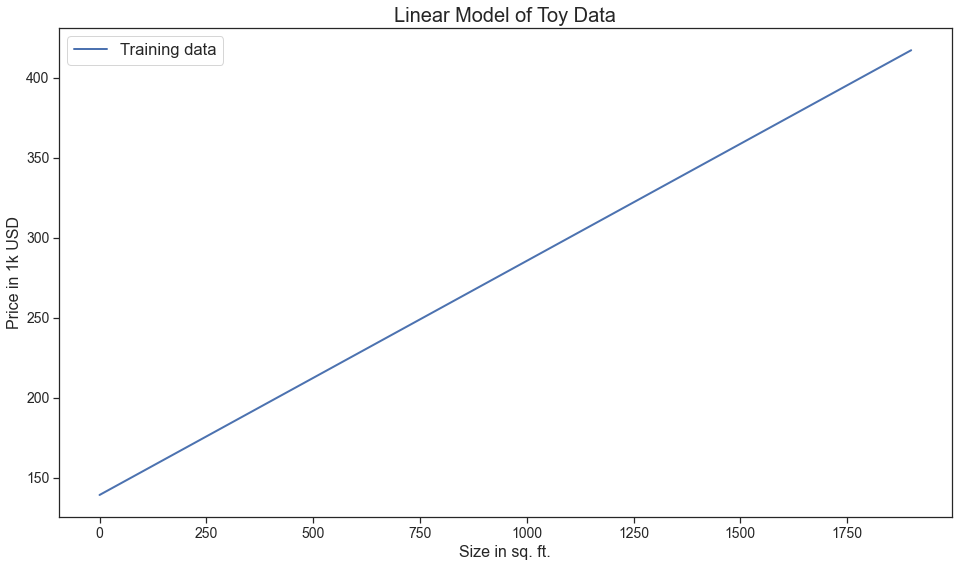

In [15]:
# your code here 
plt.plot(x_star, predicts)

plt.title('Linear Model of Toy Data')
plt.xlabel("Size in sq. ft.")
plt.ylabel("Price in 1k USD")
plt.legend(['Training data', 'Model'])
plt.show()

Pretty nifty! 😎

## 2. Finding a House in Boston

I hear that you're trying to find a house in Boston! As excited as you are to go look at some houses, I bet the data scientist inside you can't resist the urge to do some good-ol' market research first.

Okay, so maybe you're not looking to find a house in Boston, but there are many people who are interested in understanding the housing market there. More and more, professionals in various industries are turning to data science to better understand trends and gain insights in their fields. Let's give it a shot!

![boston housing](utility/pics/boston-homes.jpg)
Image sourced from [Boston Magazine](https://www.bostonmagazine.com/property/2014/11/06/open-houses-11-7/).

### Establishing the Problem

As we discussed in Lab 1, the data science workflow we will follow in this class begins with developing a question. For this example, let's go with this:

> _Can we identify any patterns and trends in the Boston housing market? And, if so, can we build a model to predict the price of a house given some of its specs?_

**Write-up!** What other kinds of questions would be interesting to ask about in regards to this dataset? Discuss with your neighbors and record your discussion in the cell below.

**How do the housing prices in Boston compare with housing prices from other areas?** 


### Acquiring the Data

In the field, you will often have to collect and process the data you need on your own. In this case, however, we will be using data that has already been collected and cleaned. The cell below downloads the dataset hosted by [Scikit Learn](https://scikit-learn.org/stable/).

In [16]:
# load dataset 
from sklearn.datasets import load_boston 
boston = load_boston() 

# check if dataset is correctly loaded
print(f'''The loaded dataset contains
    {boston.data.shape[0]} observations and
    {boston.data.shape[1]} features per observation.''')

The loaded dataset contains
    506 observations and
    13 features per observation.


Let's see what our raw data looks like. 

In [37]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

WHOA. This looks crazy! Let's try to better understand our data by looking at its components. Luckily, a lot of this data is already organized for us.

### Getting Things in Order

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was **collected in 1978** and each of the **506 entries** represent aggregated data with about **14 features** for homes from various suburbs in Boston, Massachusetts. Run the cell blow to see the names and a short description for each feature. 

In [17]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [18]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Write-Up!** Carefully look at the feature descriptions in this dataset and discuss the ethicality when using them  to build a predictive model to estimate housing prices.
> **Note**:  _ethicality_ = being in accordance with the accepted principles of right and wrong that govern the conduct of a profession

**Using race as a proxy for price could be problematic.** 


Let's take this data and put it into a NumPy array.

In [19]:
X = np.array(boston.data)
y = np.array(boston.target)

**Try this!** Evaluate `X` and `y` to see what they look like. Also, try checking their shapes. What do the values correspond to?

In [20]:
X


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## 3. Exploring the Data
After the dataset is loaded, we will make a cursory investigation about the Boston housing data and provide your observations. 

### Visualization 


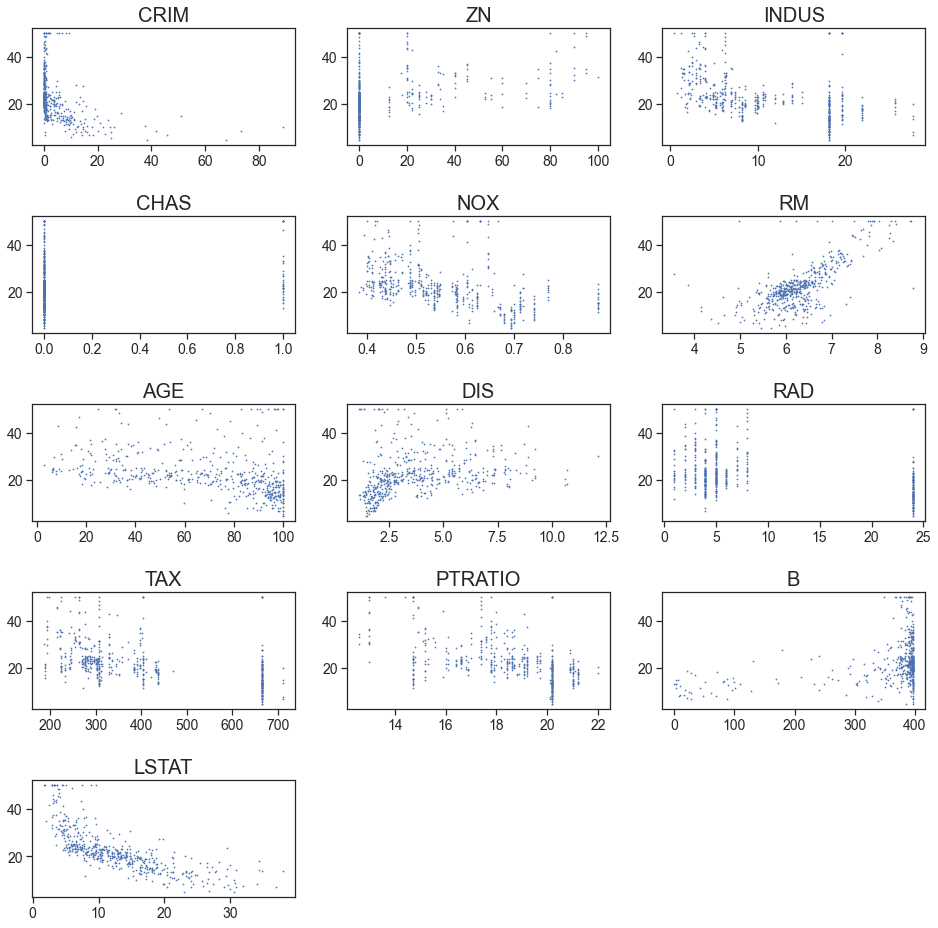

In [49]:
f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.6)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(boston.feature_names):
    ax = f.add_subplot(5, 3, index + 1)
    ax.scatter(boston.data[:, index], boston.target, s=0.5)
    ax.set_title(feature_name)
    
plt.show()

**Write-up!** Take a look at all the scatter plots and discuss the following with your group/neighbor:
1. If you can only choose one feature as predictor in the model, which one will you choose, and why?
2. Try to find all features are that negatively correlated with price. 

**Number of rooms because it seems to be the best fit. Crime, age, Lstat, tax** 


## 4. Training the Model
Now, you will train the regression model and then use it to make predictions. 

### Making Training and Test Datasets
We can **split the dataset** into two sets so that the model can be trained and tested on different data.
Testing accuracy is a better estimate than training accuracy for out-of-sample performance. We usually split the dataset so that the testing portion is smaller than the training portion. An 80/20 split is generally a safe bet.

In [50]:
# split the data into training and testing
from sklearn.model_selection import train_test_split

N = len(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# check the split is successful
print(f'{100 * X_train.shape[0] / N:0.2f}% of data in training set')
print(f'{100 * X_test.shape[0] / N:0.2f}% of data in test set')

79.84% of data in training set
20.16% of data in test set


There are approximately 80% training and 20% testing, so split is successful.

### Regression on Boston Housing data

Now we try to implement the function we previously wrote on the larger boston dataset. Note that we are only using the training portion of the data so we can later evaluate our model performance using the testing data. Let's try building a model that regresses `PRICE` on the feature that you identified as the most promising one in the previous write-up.

**Try this!** In the following cell, set the variable `selected_predictor` to your chosen feature label (string).

In [51]:
# your code here 
selected_predictor = "RM"

# retrieve the index of the supplied target
predictor_index = boston.feature_names.tolist().index(selected_predictor)

# Extract feature of interest from training dataest
X_train_target = X_train[:, predictor_index]

Now that we have isolated the target feature, let's build a model with the functions we have already implemented.

In [63]:
# Train model on X_train_target (training inputs) and y_train (training observations)

# your code here 
for feature in boston.feature_names:
    selected_predictor = feature

# retrieve the index of the supplied target
    predictor_index = boston.feature_names.tolist().index(selected_predictor)

# Extract feature of interest from training dataest
    X_train_target = X_train[:, predictor_index]
    w, b = fit(X_train_target,y_train)


    print(f'w = {w}, b = {b}')
    print(feature)



w = -0.3791036605814182, b = 23.323859756112217
CRIM
w = 0.15049080299627404, b = 20.14936890244166
ZN
w = -0.6404855772570877, b = 29.23690352394409
INDUS
w = 5.436300225955396, b = 21.47851458885942
CHAS
w = -33.85709467739585, b = 40.7568015840898
NOX
w = 8.63905126070535, b = -32.05815001914331
RM
w = -0.12914702552622614, b = 30.781139446826586
AGE
w = 1.1857968519932574, b = 17.381705724328974
DIS
w = -0.3743490867936677, b = 25.56123077819253
RAD
w = -0.024219877089277395, b = 31.947155747333607
TAX
w = -2.0001365700259224, b = 58.946345390386824
PTRATIO
w = 0.03167155766583511, b = 10.644227038500768
B
w = -0.9313698756720884, b = 34.00764320074683
LSTAT


Recycling our previous plotting code from our toy implementation, we can see our regression model against a scatter of our data points.

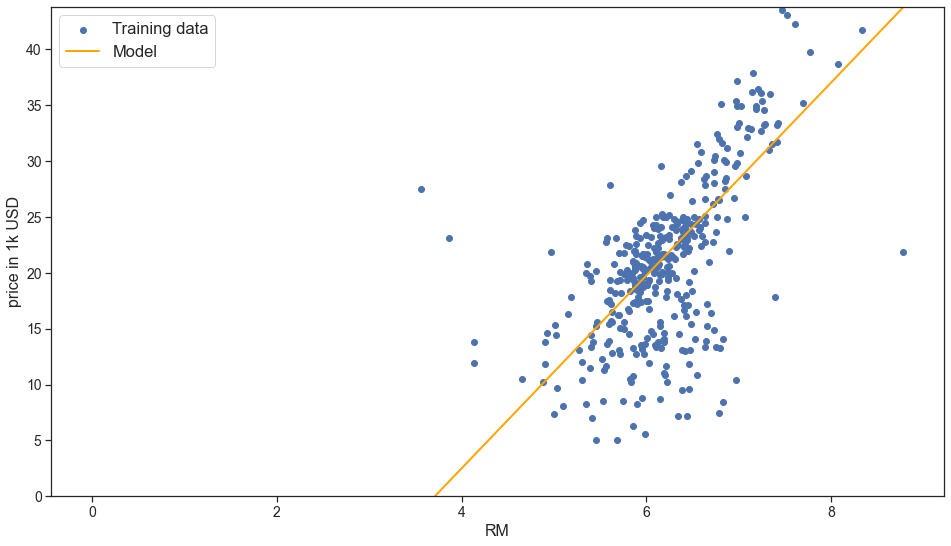

In [56]:
# create an array with 1000 equally spaced values in the range 0 to x.max
x_star = np.linspace(0, X_train_target.max(), 1000)

# get the predictions for each of those values
y_star = predict(w, b, x_star)

# plot the points using a scatter plot (note this is not a line... it just looks like one)
ax1 = plt.scatter(X_train_target, y_train)
ax2, = plt.plot(x_star, y_star, color="orange")
plt.xlabel(selected_predictor)
plt.ylabel("price in 1k USD")
plt.ylim(0, y_star.max())
plt.legend((ax1, ax2), ('Training data', 'Model'))
plt.show()

**Write-up!** What do you think of this model? Try this process again on a different predictor (feature) and write about how it compares in the cell below.

**Rm and Lstat are both decent fits judging by appearance.** 


## 5. Analyzing Model Performance

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. In this section, you will see some common methods we used to evaluate the performance of a model. 

### Root Mean Squared Error

Recall from our derivation in lecture that our linear regression model minimizes the **residual sum of squares (RSS)**, $$\text{RSS} = \displaystyle \sum_{i=1}^n (y_i - f(x_i))^2, $$where $f(x)$ is our trained model. A common way to measure model performance is to compute the scaled RSS or **mean squared error (MSE)**, $$\text{MSE} = \displaystyle \frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2$$

Taking things a step further, we can report this metric in the original units (e.g. thousands of dollars) by simply taking the square root to get **root mean squared error (RMSE)**, $$\text{RMSE} = \displaystyle \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2}$$

Essentially, we will compute the mean of the squared differences between the actual value and the predicted value, and take the square root. The function is provided in scikit-learn:

In [55]:
from sklearn.metrics import mean_squared_error

X_test_target = X_test[:, predictor_index] 

# Predict y_pred for X_test_target (test inputs)

# your code here 

Y_pred = predict(w, b, X_test_target)



# Evaluate predictions
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
f'RMSE: {rmse}'

'RMSE: 6.752920440469002'

The RMSE is regarded as a measure of the quality of an estimator — it is always non-negative (we are computing squares), and values closer to zero are better (this suggests the predicted values are closer to the actual value). 

**Write-up!** Why do we use different datasets to train and evaluate the model? Discuss with your neighbors.

**To make sure our model is capable of being applied to the population, and not just the sample** 


**Try this!** To wrap up, let's plot our model with both our training and testing sets in the _same_ figure. Ensure that you have all the components of a nice plot, making sure to include things like axes labels, a title, and a legend (when applicable). 
> **Hint**: Refer to the plotting from earlier as an example.

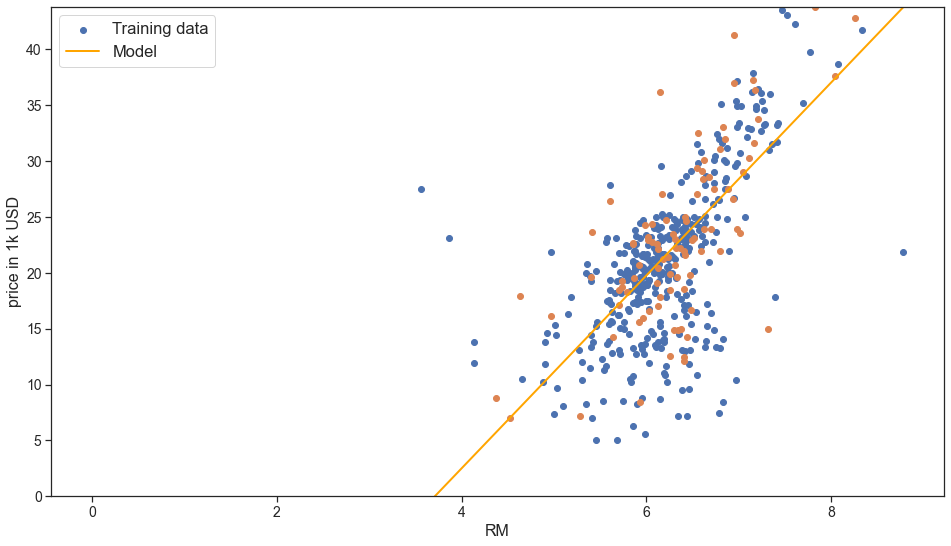

In [59]:
x_star = np.linspace(0, X_train_target.max(), 1000)

# get the predictions for each of those values
y_star = predict(w, b, x_star)

# plot the points using a scatter plot (note this is not a line... it just looks like one)
ax1 = plt.scatter(X_train_target, y_train)
ax2, = plt.plot(x_star, y_star, color="orange")
ax3 = plt.scatter( X_test_target, y_test)
plt.xlabel(selected_predictor)
plt.ylabel("price in 1k USD")
plt.ylim(0, y_star.max())
plt.legend((ax1, ax2), ('Training data', 'Model'))
plt.show()

## 6. Communicate your Results
It is once again time to summarize your findings. Did you find a satisfying solution to the given business problem: prediciting housing prices? 


**Write-up!** Answer the following questions. 
* What are the strengths and limitations of the implemented/used approach(es)? 
* Which feature did you use?
* Summarize/restate the evaluation result and briefly comment on whether this result is good/entirley satisfiying? 
* What could be imporved in the future?

**Your response here:** 


**Write-up!** Are there **other features** that are better predictors? If you ahve time (let's say mor than 15min left), go back to Part 4 (**Regression on Boston Housing data**) and select another feature by changing the `selected_predictor` variable (or try as many as you have time for) to see if another feature performs better.   



**Rooms seems satisfactory enough, though a better model would incorporate more categories than just one. ** 
